In [1]:
import pandas as pd

train = pd.read_excel('../data/final_train.xlsx')
test = pd.read_excel('../data/final_test.xlsx')
oot = pd.read_excel('../data/final_oot.xlsx')

In [2]:
CRTOC_AG_NBJCRE_2T_IND_0009= {0:1, 1:0}
CRTOC_AG_LIGDEB_2T_IND_0015 = {0:1, 1:0} 
CRTOC_AG_MVTAFF_2T_IND_0010= {0:2, 1:1, 2:0} 
CRTOC_MOY_MVTAFF_IND_0010 = {0:2, 1:1, 2:0} 

train['CRTOC_AG_NBJCRE_2T_IND_0009'] = train['CRTOC_AG_NBJCRE_2T_IND_0009'].map(CRTOC_AG_NBJCRE_2T_IND_0009)
test['CRTOC_AG_NBJCRE_2T_IND_0009'] = test['CRTOC_AG_NBJCRE_2T_IND_0009'].map(CRTOC_AG_NBJCRE_2T_IND_0009)
oot['CRTOC_AG_NBJCRE_2T_IND_0009'] = oot['CRTOC_AG_NBJCRE_2T_IND_0009'].map(CRTOC_AG_NBJCRE_2T_IND_0009)

train['CRTOC_AG_LIGDEB_2T_IND_0015'] = train['CRTOC_AG_LIGDEB_2T_IND_0015'].map(CRTOC_AG_LIGDEB_2T_IND_0015)
test['CRTOC_AG_LIGDEB_2T_IND_0015'] = test['CRTOC_AG_LIGDEB_2T_IND_0015'].map(CRTOC_AG_LIGDEB_2T_IND_0015)
oot['CRTOC_AG_LIGDEB_2T_IND_0015'] = oot['CRTOC_AG_LIGDEB_2T_IND_0015'].map(CRTOC_AG_LIGDEB_2T_IND_0015)

train['CRTOC_AG_MVTAFF_2T_IND_0010'] = train['CRTOC_AG_MVTAFF_2T_IND_0010'].map(CRTOC_AG_MVTAFF_2T_IND_0010)
test['CRTOC_AG_MVTAFF_2T_IND_0010'] = test['CRTOC_AG_MVTAFF_2T_IND_0010'].map(CRTOC_AG_MVTAFF_2T_IND_0010)
oot['CRTOC_AG_MVTAFF_2T_IND_0010'] = oot['CRTOC_AG_MVTAFF_2T_IND_0010'].map(CRTOC_AG_MVTAFF_2T_IND_0010)

train['CRTOC_MOY_MVTAFF_IND_0010'] = train['CRTOC_MOY_MVTAFF_IND_0010'].map(CRTOC_MOY_MVTAFF_IND_0010)
test['CRTOC_MOY_MVTAFF_IND_0010'] = test['CRTOC_MOY_MVTAFF_IND_0010'].map(CRTOC_MOY_MVTAFF_IND_0010)
oot['CRTOC_MOY_MVTAFF_IND_0010'] = oot['CRTOC_MOY_MVTAFF_IND_0010'].map(CRTOC_MOY_MVTAFF_IND_0010)

In [3]:
# Pour chaque colonne catégorielle du DataFrame
for column in train.columns:
    if column != "DDefaut_NDB":
        print(f"Taux de défaut pour chaque classe de '{column}':")
        
        # Calculer le taux de défaut pour chaque classe de la variable catégorielle
        taux_defaut = train.groupby(column)['DDefaut_NDB'].mean()
        
        # Afficher le taux de défaut
        print(taux_defaut)
        print("\n")

Taux de défaut pour chaque classe de 'CRTOC_IND_0015':
CRTOC_IND_0015
0    0.022745
1    0.097493
2    0.494382
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_AG_NBJCRE_2T_IND_0009':
CRTOC_AG_NBJCRE_2T_IND_0009
0    0.037697
1    0.350485
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_AG_LIGDEB_2T_IND_0015':
CRTOC_AG_LIGDEB_2T_IND_0015
0    0.022641
1    0.227068
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_AG_MVTAFF_2T_IND_0010':
CRTOC_AG_MVTAFF_2T_IND_0010
0    0.021304
1    0.055508
2    0.201160
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_MOY_MVTAFF_IND_0010':
CRTOC_MOY_MVTAFF_IND_0010
0    0.022212
1    0.055098
2    0.142684
Name: DDefaut_NDB, dtype: float64




In [4]:
import statsmodels.api as sm

variables = train.columns.tolist()
variables.remove('DDefaut_NDB')

X_train = train[variables]
X_test = test[variables]
X_oot = oot[variables]

y_train = train['DDefaut_NDB']
y_test = test['DDefaut_NDB']
y_oot = oot['DDefaut_NDB']

# Convertir toutes les colonnes en type 'category'
X_train = X_train.apply(lambda col: col.astype('category'))
X_test = X_test.apply(lambda col: col.astype('category'))
X_oot = X_oot.apply(lambda col: col.astype('category'))

# Appliquer l'encodage One-Hot sur toutes les colonnes catégorielles
X_train_encoded = pd.get_dummies(X_train, drop_first=True) # On mets True car sinon on aura des problèmes de colinéarité notament lorsqu'il y a des classes
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_oot_encoded = pd.get_dummies(X_oot, drop_first=True)

# Convertir les colonnes booléennes en entiers (0/1)
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)
X_oot_encoded = X_oot_encoded.astype(int)

# Afficher X_train_encoded après la suppression de la colonne
X_train_encoded


,CRTOC_IND_0015_1,CRTOC_IND_0015_2,CRTOC_AG_NBJCRE_2T_IND_0009_1,CRTOC_AG_LIGDEB_2T_IND_0015_1,CRTOC_AG_MVTAFF_2T_IND_0010_1,CRTOC_AG_MVTAFF_2T_IND_0010_2,CRTOC_MOY_MVTAFF_IND_0010_1,CRTOC_MOY_MVTAFF_IND_0010_2
0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
14713,0,0,0,0,0,1,0,1
14714,0,0,1,0,0,1,0,1
14715,0,0,0,0,0,0,0,0
14716,0,0,1,0,0,1,0,1


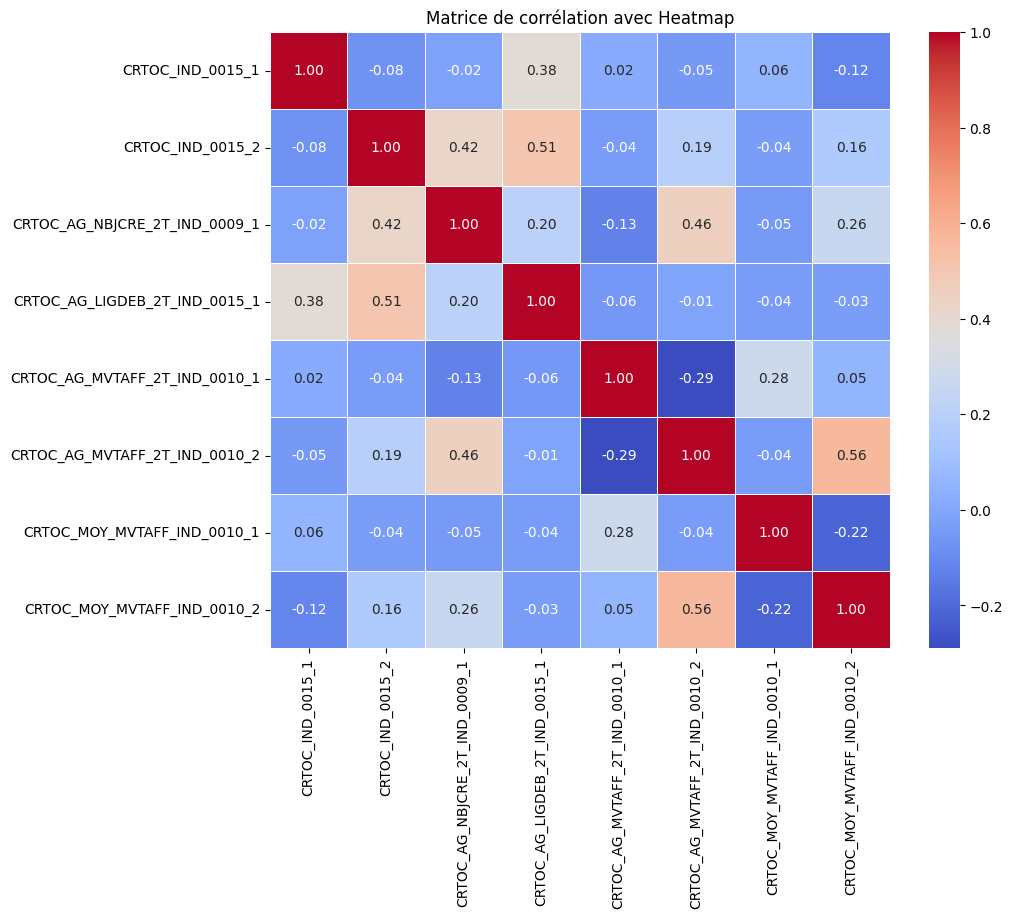

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = X_train_encoded.corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation avec Heatmap')
plt.show()


In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(X_train, X_test, y_train):
    """
    Parameters:
    -----------
    X_train : pandas.DataFrame
        Les variables explicatives pour l'ensemble d'entraînement.
    X_test : pandas.DataFrame
        Les variables explicatives pour l'ensemble de test.
    y_train : pandas.Series
        La variable cible pour l'ensemble d'entraînement.

    Returns:
    --------
    y_pred : numpy.ndarray
        Les prédictions de classes (0 ou 1) pour l'ensemble de test.
    model : statsmodels.discrete.discrete_model.DiscreteModel
        Le modèle de régression logistique entraîné.
    """

    # Ajouter une constante à X_train
    X_train = sm.add_constant(X_train)

    # Créer et entraîner le modèle
    model = sm.Logit(y_train, X_train).fit()

    # Obtenir les prédictions
    y_pred_prob = model.predict(sm.add_constant(X_test))
          
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convertir les probabilités en classes

    # Afficher le résumé du modèle
    print(model.summary())

    # Obtenir les coefficients et les intervalles de confiance
    conf = model.conf_int()
    odds_ratios = np.exp(model.params)

    # Créer un DataFrame pour une meilleure visualisation
    results = pd.DataFrame({'coef': model.params, 'odds_ratio': odds_ratios, 'CI_inf': np.exp(conf.iloc[:, 0]), 'CI_sup': np.exp(conf.iloc[:, 1])})
    print(results)

    return y_pred, y_pred_prob, model

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def plot_confusion_matrix(y_true, y_pred):
    """
    Affiche une matrice de confusion avec Seaborn.
    
    Parameters:
        y_true (array-like): Valeurs réelles des cibles.
        y_pred (array-like): Prédictions du modèle.
        labels (list, optional): Liste des étiquettes pour les classes (par défaut, déduites de y_true et y_pred).
    """
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)

    # Extraire les valeurs de la matrice de confusion
    tn, fp, fn, tp = cm.ravel()

    # Calculer les métriques
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Évite la division par zéro
    f1 = f1_score(y_true, y_pred)

    # Créer un heatmap Seaborn pour la matrice
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Prédictions', fontsize=12)
    plt.ylabel('Réel', fontsize=12)
    plt.title('Matrice de Confusion', fontsize=14)
    plt.show()

    # Afficher les métriques
    print(f"Précision (Precision): {precision:.3f}")
    print(f"Rappel (Recall): {recall:.3f}")
    print(f"Taux de Faux Positifs (FPR): {fpr:.3f}")
    print(f"F1 score: {f1:.3f}")


In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred_prob):
    """
    Trace la courbe ROC et affiche l'AUC.
    
    Parameters:
        y_true (array-like): Les valeurs réelles des cibles (0 ou 1).
        y_pred_prob (array-like): Les probabilités prédites pour la classe positive.
    """
    # Calcul des métriques ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    gini_score = (2*auc_score) - 1
    
    # Tracé de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.3f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Model")
    
    # Ajout des labels et du titre
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.title("ROC Curve", fontsize=14)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print(f"AUC: {auc_score}")
    print(f"GINI: {gini_score}")

In [9]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_pr_curve(y_true, y_pred_prob):
    """
    Trace la courbe Precision-Recall pour un modèle.
    
    Parameters:
    -----------
    y_true : array-like
        Les vraies étiquettes (0 ou 1).
    y_pred_prob : array-like
        Les probabilités prédites pour la classe positive.
    """
    # Calculer précision, rappel et seuils
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    avg_precision = average_precision_score(y_true, y_pred_prob)
    
    # Tracer la courbe Precision-Recall
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"Courbe PR (AP = {avg_precision:.2f})", color="blue")
    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title("Courbe Precision-Recall", fontsize=14)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.show()

    print(f"AUC PR: {avg_precision}")

## Séléction des variables par méthode forward

In [10]:
variables = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
             'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [11]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])

for name, modalites in variables.items():
    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_encoded[modalites], X_test_encoded[modalites], y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.162861
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.185419
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203185
         Iterations 8
                     Variables          AIC
0               CRTOC_IND_0015  4799.984161
1  CRTOC_AG_NBJCRE_2T_IND_0009  5733.726554
2  CRTOC_AG_LIGDEB_2T_IND_0015  5461.997344
3  CRTOC_AG_MVTAFF_2T_IND_0010  5871.986506
4    CRTOC_MOY_MVTAFF_IND_0010  5986.947370


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2654608943.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_IND_0015  

In [12]:
variables = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [13]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])

for name, modalites in variables.items():
    modalites.append("CRTOC_IND_0015_1")
    modalites.append("CRTOC_IND_0015_2")

    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_encoded[modalites], X_test_encoded[modalites], y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.157414
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.160544
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.147106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.147466
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4641.651478
1  CRTOC_AG_LIGDEB_2T_IND_0015  4733.776942
2  CRTOC_AG_MVTAFF_2T_IND_0010  4340.224179
3    CRTOC_MOY_MVTAFF_IND_0010  4350.822630


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\426530134.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_AG_MVTAFF_2T_IND_0010  

In [14]:
variables = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [15]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])

for name, modalites in variables.items():
    modalites.append("CRTOC_IND_0015_1")
    modalites.append("CRTOC_IND_0015_2")
    modalites.append("CRTOC_AG_MVTAFF_2T_IND_0010_1")
    modalites.append("CRTOC_AG_MVTAFF_2T_IND_0010_2")

    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_encoded[modalites], X_test_encoded[modalites], y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.146395
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140893
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.144443
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4321.282061
1  CRTOC_AG_LIGDEB_2T_IND_0015  4159.320392
2    CRTOC_MOY_MVTAFF_IND_0010  4265.821809


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\740673786.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_AG_LIGDEB_2T_IND_0015  

In [16]:
variables = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [17]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])

for name, modalites in variables.items():
    modalites.append("CRTOC_IND_0015_1")
    modalites.append("CRTOC_IND_0015_2")
    modalites.append("CRTOC_AG_MVTAFF_2T_IND_0010_1")
    modalites.append("CRTOC_AG_MVTAFF_2T_IND_0010_2")
    modalites.append("CRTOC_AG_LIGDEB_2T_IND_0015_1")

    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_encoded[modalites], X_test_encoded[modalites], y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.140563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.137765
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4151.612690
1    CRTOC_MOY_MVTAFF_IND_0010  4071.236727


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\3629538824.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_MOY_MVTAFF_IND_0010  

In [18]:
variables = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1']}

In [19]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])

for name, modalites in variables.items():
    modalites.append("CRTOC_IND_0015_1")
    modalites.append("CRTOC_IND_0015_2")
    modalites.append("CRTOC_AG_MVTAFF_2T_IND_0010_1")
    modalites.append("CRTOC_AG_MVTAFF_2T_IND_0010_2")
    modalites.append("CRTOC_AG_LIGDEB_2T_IND_0015_1")
    modalites.append("CRTOC_MOY_MVTAFF_IND_0010_1")
    modalites.append("CRTOC_MOY_MVTAFF_IND_0010_2")

    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_encoded[modalites], X_test_encoded[modalites], y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.137311
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4059.893228


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\1368632340.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


Finalement on prend toutes les variables d'après la méthode Forward

## Séléction des variables par méthode Backward

In [20]:
variables = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
             'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [21]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])
X_train_backward = X_train_encoded
X_test_backward = X_test_encoded

for name, modalites in variables.items():
    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_backward.drop(columns=modalites), X_test_backward.drop(columns=modalites), y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.144675
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.137765
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.143532
         Iterations 8


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2764704094.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


Optimization terminated successfully.
         Current function value: 0.140169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140563
         Iterations 8
                     Variables          AIC
0               CRTOC_IND_0015  4272.651726
1  CRTOC_AG_NBJCRE_2T_IND_0009  4071.236727
2  CRTOC_AG_LIGDEB_2T_IND_0015  4240.994776
3  CRTOC_AG_MVTAFF_2T_IND_0010  4140.010406
4    CRTOC_MOY_MVTAFF_IND_0010  4151.612690


On enlève CRTOC_AG_NBJCRE_2T_IND_0009

In [22]:
variables = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'],  
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [23]:
import pandas as pd

# Initialisation correcte du DataFrame
result = pd.DataFrame(columns=['Variables', 'AIC'])
X_train_backward = X_train_encoded
X_test_backward = X_test_encoded

for name, modalites in variables.items():
    modalites.append('CRTOC_AG_NBJCRE_2T_IND_0009_1')
    
    # Appel à la fonction `evaluate_model`
    _, _, model = evaluate_model(X_train_backward.drop(columns=modalites), X_test_backward.drop(columns=modalites), y_train)
    
    # Ajout des résultats au DataFrame
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

# Affichage du résultat
print(result)

Optimization terminated successfully.
         Current function value: 0.146942
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.144443
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.141973
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140893
         Iterations 8
                     Variables          AIC
0               CRTOC_IND_0015  4337.384645
1  CRTOC_AG_LIGDEB_2T_IND_0015  4265.821809
2  CRTOC_AG_MVTAFF_2T_IND_0010  4191.116308
3    CRTOC_MOY_MVTAFF_IND_0010  4159.320392


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2591871671.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On ne supprime pas de variable car une telle suppression augmente l'AUC

## Methode stepwise

In [24]:
variables_to_add = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
             'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

variables_to_drop = {}

In [25]:
result_add = pd.DataFrame(columns=['Variables', 'AIC'])
result_drop = pd.DataFrame(columns=['Variables', 'AIC'])

X_train_stepwise = X_train_encoded
X_test_stepwise = X_test_encoded

for name, modalites in variables_to_add.items():
    _, _, model = evaluate_model(X_train_stepwise[modalites], X_test_stepwise[modalites], y_train)
    result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

for name, modalites in variables_to_drop.items():
    _, _, model = evaluate_model(X_train_stepwise.drop(columns=modalites), X_test_stepwise.drop(columns=modalites), y_train)
    result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result_add)
print(result_drop)

Optimization terminated successfully.
         Current function value: 0.162861
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.185419
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203185
         Iterations 8
                     Variables          AIC
0               CRTOC_IND_0015  4799.984161
1  CRTOC_AG_NBJCRE_2T_IND_0009  5733.726554
2  CRTOC_AG_LIGDEB_2T_IND_0015  5461.997344
3  CRTOC_AG_MVTAFF_2T_IND_0010  5871.986506
4    CRTOC_MOY_MVTAFF_IND_0010  5986.947370
Empty DataFrame
Columns: [Variables, AIC]
Index: []


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\3852172351.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On garde CRTOC_IND_0015  

In [26]:
variables_to_add = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

variables_to_drop = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2']}

In [27]:
result_add = pd.DataFrame(columns=['Variables', 'AIC'])
result_drop = pd.DataFrame(columns=['Variables', 'AIC'])

X_train_stepwise = X_train_encoded
X_test_stepwise = X_test_encoded

modalites_base = ["CRTOC_IND_0015_1", "CRTOC_IND_0015_2"]

for name, modalites in variables_to_add.items():
    modalites.extend(modalites_base)
    _, _, model = evaluate_model(X_train_stepwise[modalites], X_test_stepwise[modalites], y_train)
    result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

for name, modalites in variables_to_drop.items():
    _, _, model = evaluate_model(X_train_stepwise[modalites_base].drop(columns=modalites), X_test_stepwise[modalites_base].drop(columns=modalites), y_train)
    result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result_add)
print(result_drop)

Optimization terminated successfully.
         Current function value: 0.157414
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.160544
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.147106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.147466
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.225829
         Iterations 7
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4641.651478
1  CRTOC_AG_LIGDEB_2T_IND_0015  4733.776942
2  CRTOC_AG_MVTAFF_2T_IND_0010  4340.224179
3    CRTOC_MOY_MVTAFF_IND_0010  4350.822630
        Variables          AIC
0  CRTOC_IND_0015  6649.512694


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2147419438.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)
C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2147419438.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_AG_MVTAFF_2T_IND_0010

In [28]:
variables_to_add = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

variables_to_drop = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
                     'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2']}

In [29]:
result_add = pd.DataFrame(columns=['Variables', 'AIC'])
result_drop = pd.DataFrame(columns=['Variables', 'AIC'])

X_train_stepwise = X_train_encoded
X_test_stepwise = X_test_encoded

modalites_base = ["CRTOC_IND_0015_1", "CRTOC_IND_0015_2", "CRTOC_AG_MVTAFF_2T_IND_0010_1", "CRTOC_AG_MVTAFF_2T_IND_0010_2"]

for name, modalites in variables_to_add.items():
    modalites.extend(modalites_base)
    _, _, model = evaluate_model(X_train_stepwise[modalites], X_test_stepwise[modalites], y_train)
    result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

for name, modalites in variables_to_drop.items():
    _, _, model = evaluate_model(X_train_stepwise[modalites_base].drop(columns=modalites), X_test_stepwise[modalites_base].drop(columns=modalites), y_train)
    result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result_add)
print(result_drop)

Optimization terminated successfully.
         Current function value: 0.146395
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140893
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.144443
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.162861
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4321.282061
1  CRTOC_AG_LIGDEB_2T_IND_0015  4159.320392
2    CRTOC_MOY_MVTAFF_IND_0010  4265.821809
                     Variables          AIC
0               CRTOC_IND_0015  5871.986506
1  CRTOC_AG_MVTAFF_2T_IND_0010  4799.984161


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\981220999.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)
C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\981220999.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_AG_LIGDEB_2T_IND_0015  

In [30]:
variables_to_add = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

variables_to_drop = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
                     'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'], 
                     'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1']}

In [31]:
result_add = pd.DataFrame(columns=['Variables', 'AIC'])
result_drop = pd.DataFrame(columns=['Variables', 'AIC'])

X_train_stepwise = X_train_encoded
X_test_stepwise = X_test_encoded

modalites_base = ["CRTOC_IND_0015_1", "CRTOC_IND_0015_2", "CRTOC_AG_MVTAFF_2T_IND_0010_1", "CRTOC_AG_MVTAFF_2T_IND_0010_2", "CRTOC_AG_LIGDEB_2T_IND_0015_1"]

for name, modalites in variables_to_add.items():
    modalites.extend(modalites_base)
    _, _, model = evaluate_model(X_train_stepwise[modalites], X_test_stepwise[modalites], y_train)
    result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

for name, modalites in variables_to_drop.items():
    _, _, model = evaluate_model(X_train_stepwise[modalites_base].drop(columns=modalites), X_test_stepwise[modalites_base].drop(columns=modalites), y_train)
    result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result_add)
print(result_drop)

Optimization terminated successfully.
         Current function value: 0.140563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.137765
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.150788
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.160544
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.147106
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4151.612690
1    CRTOC_MOY_MVTAFF_IND_0010  4071.236727
                     Variables          AIC
0               CRTOC_IND_0015  4446.589143
1  CRTOC_AG_MVTAFF_2T_IND_0010  4733.776942
2  CRTOC_AG_LIGDEB_2T_IND_0015  4340.224179


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\101484671.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)
C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\101484671.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_MOY_MVTAFF_IND_0010  

In [32]:
variables_to_add = {'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1']}

variables_to_drop = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
                     'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'], 
                     'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
                     'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

In [33]:
result_add = pd.DataFrame(columns=['Variables', 'AIC'])
result_drop = pd.DataFrame(columns=['Variables', 'AIC'])

X_train_stepwise = X_train_encoded
X_test_stepwise = X_test_encoded

modalites_base = ["CRTOC_IND_0015_1", "CRTOC_IND_0015_2", "CRTOC_AG_MVTAFF_2T_IND_0010_1", "CRTOC_AG_MVTAFF_2T_IND_0010_2", "CRTOC_AG_LIGDEB_2T_IND_0015_1", 'CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']

for name, modalites in variables_to_add.items():
    modalites.extend(modalites_base)
    _, _, model = evaluate_model(X_train_stepwise[modalites], X_test_stepwise[modalites], y_train)
    result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

for name, modalites in variables_to_drop.items():
    _, _, model = evaluate_model(X_train_stepwise[modalites_base].drop(columns=modalites), X_test_stepwise[modalites_base].drop(columns=modalites), y_train)
    result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result_add)
print(result_drop)

Optimization terminated successfully.
         Current function value: 0.137311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.146942
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.141973
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.144443
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140893
         Iterations 8
                     Variables          AIC
0  CRTOC_AG_NBJCRE_2T_IND_0009  4059.893228
                     Variables          AIC
0               CRTOC_IND_0015  4337.384645
1  CRTOC_AG_MVTAFF_2T_IND_0010  4191.116308
2  CRTOC_AG_LIGDEB_2T_IND_0015  4265.821809
3    CRTOC_MOY_MVTAFF_IND_0010  4159.320392


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2501262229.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)
C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2501262229.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend CRTOC_AG_NBJCRE_2T_IND_0009  

In [34]:
variables_to_add = {}

variables_to_drop = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
                     'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'], 
                     'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
                     'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2'], 
                     'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1']}

In [35]:
result_add = pd.DataFrame(columns=['Variables', 'AIC'])
result_drop = pd.DataFrame(columns=['Variables', 'AIC'])

X_train_stepwise = X_train_encoded
X_test_stepwise = X_test_encoded

modalites_base = ["CRTOC_IND_0015_1", "CRTOC_IND_0015_2", "CRTOC_AG_MVTAFF_2T_IND_0010_1", "CRTOC_AG_MVTAFF_2T_IND_0010_2", "CRTOC_AG_LIGDEB_2T_IND_0015_1", 'CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2', 'CRTOC_AG_NBJCRE_2T_IND_0009_1']

for name, modalites in variables_to_add.items():
    modalites.extend(modalites_base)
    _, _, model = evaluate_model(X_train_stepwise[modalites], X_test_stepwise[modalites], y_train)
    result_add = pd.concat([result_add, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

for name, modalites in variables_to_drop.items():
    _, _, model = evaluate_model(X_train_stepwise[modalites_base].drop(columns=modalites), X_test_stepwise[modalites_base].drop(columns=modalites), y_train)
    result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result_add)
print(result_drop)

Optimization terminated successfully.
         Current function value: 0.144675
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.143532
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.137765
         Iterations 8
Empty DataFrame
Columns: [Variables, AIC]
Index: []
                     Variables          AIC
0               CRTOC_IND_0015  4272.651726
1  CRTOC_AG_MVTAFF_2T_IND_0010  4140.010406
2  CRTOC_AG_LIGDEB_2T_IND_0015  4240.994776
3    CRTOC_MOY_MVTAFF_IND_0010  4151.612690
4  CRTOC_AG_NBJCRE_2T_IND_0009  4071.236727


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2245543473.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_drop = pd.concat([result_drop, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


Finalement on garde toutes les variables ! 

## Modèle forward selon le critère de corrélation a la cible

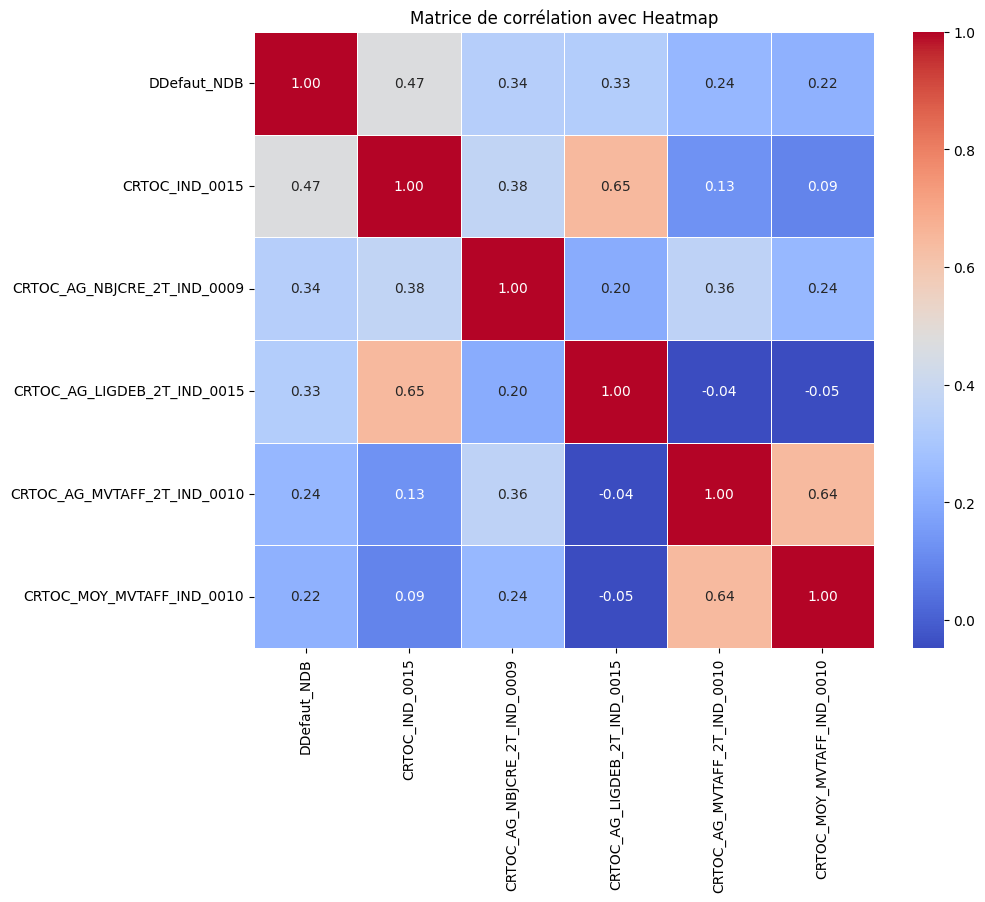

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = train.corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation avec Heatmap')
plt.show()

In [37]:
variables = {'CRTOC_IND_0015':['CRTOC_IND_0015_1', 'CRTOC_IND_0015_2'], 
             'CRTOC_AG_NBJCRE_2T_IND_0009': ['CRTOC_AG_NBJCRE_2T_IND_0009_1'], 
             'CRTOC_AG_LIGDEB_2T_IND_0015': ['CRTOC_AG_LIGDEB_2T_IND_0015_1'], 
             'CRTOC_AG_MVTAFF_2T_IND_0010': ['CRTOC_AG_MVTAFF_2T_IND_0010_1', 'CRTOC_AG_MVTAFF_2T_IND_0010_2'],
             'CRTOC_MOY_MVTAFF_IND_0010': ['CRTOC_MOY_MVTAFF_IND_0010_1', 'CRTOC_MOY_MVTAFF_IND_0010_2']}

result = pd.DataFrame(columns=['Variables', 'AIC'])
modalites_iter = []

for name, modalites in variables.items():
    modalites_iter.extend(modalites)
    _, _, model = evaluate_model(X_train_encoded[modalites_iter], X_test_encoded[modalites_iter], y_train)
    result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)

print(result)

Optimization terminated successfully.
         Current function value: 0.162861
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.157414
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.155265
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.137311
         Iterations 8
                     Variables          AIC
0               CRTOC_IND_0015  4799.984161
1  CRTOC_AG_NBJCRE_2T_IND_0009  4641.651478
2  CRTOC_AG_LIGDEB_2T_IND_0015  4580.368023
3  CRTOC_AG_MVTAFF_2T_IND_0010  4151.612690
4    CRTOC_MOY_MVTAFF_IND_0010  4059.893228


C:\Users\Moreau\AppData\Local\Temp\ipykernel_11952\2278977623.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame({'Variables': [name], 'AIC': [model.aic]})], ignore_index=True)


On prend toutes les variables

## Vérification de la significativité des modèles

In [38]:
# Évaluer le modèle
y_pred, y_pred_prob, model = evaluate_model(X_train_encoded, X_test_encoded, y_train)

print(model.aic)
print(model.bic)

auc_score = roc_auc_score(y_test, y_pred_prob)
gini_score = (2*auc_score) - 1
print(gini_score)

Optimization terminated successfully.
         Current function value: 0.137311
         Iterations 8
4059.8932276504365
4128.264666271815
0.7683632857148175


In [39]:
# Évaluer le modèle
y_pred, y_pred_prob, model = evaluate_model(X_train_encoded.drop(columns=['CRTOC_AG_NBJCRE_2T_IND_0009_1']), X_test_encoded.drop(columns=['CRTOC_AG_NBJCRE_2T_IND_0009_1']), y_train)

print(model.aic)
print(model.bic)

auc_score = roc_auc_score(y_test, y_pred_prob)
gini_score = (2*auc_score) - 1
print(gini_score)

Optimization terminated successfully.
         Current function value: 0.137765
         Iterations 8
4071.2367269716106
4132.011339079503
0.7699336914960555


On garde le modèle avec toutes les variables

## Analyse du meilleur modèle

verifier significativité models retenus

Optimization terminated successfully.
         Current function value: 0.137311
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            DDefaut_NDB   No. Observations:                14718
Model:                          Logit   Df Residuals:                    14709
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.3920
Time:                        11:02:37   Log-Likelihood:                -2020.9
converged:                       True   LL-Null:                       -3323.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -5.4182      0.116    -46.793      0.

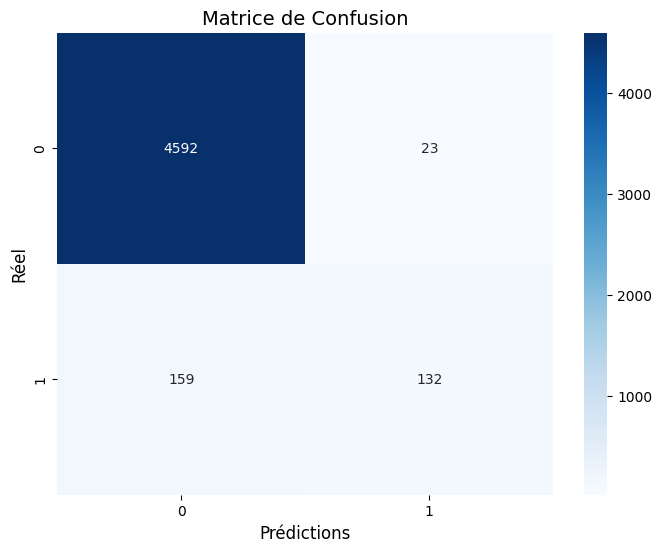

Précision (Precision): 0.852
Rappel (Recall): 0.454
Taux de Faux Positifs (FPR): 0.005
F1 score: 0.592


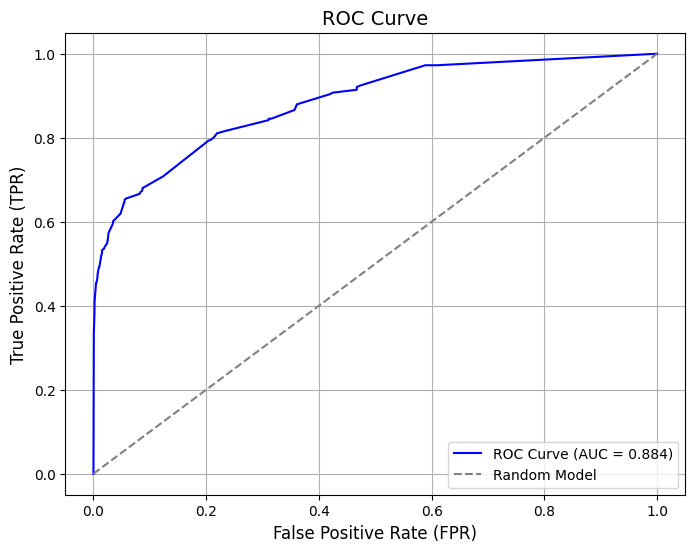

AUC: 0.8841816428574087
GINI: 0.7683632857148175


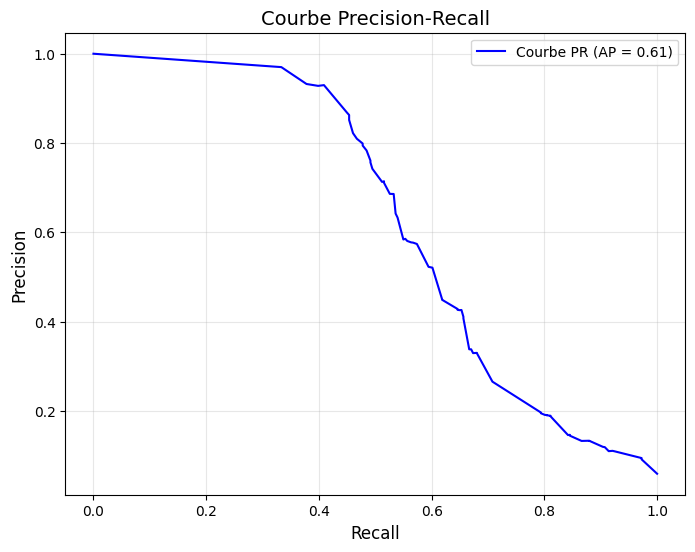

AUC PR: 0.6105898472400635


In [43]:
# Évaluer le modèle
y_pred, y_pred_prob, model = evaluate_model(X_train_encoded, X_test_encoded, y_train)

# Tracer la matrice de confusion
plot_confusion_matrix(y_test, y_pred)

# Tracer la courbe ROC
plot_roc_curve(y_test, y_pred_prob)

# Tracer la courbe PR
plot_pr_curve(y_test, y_pred_prob)

## Création de la grille de score